# The Carbonic Acid/Bicarbonate/Carbonate Equilibrium $\require{mhchem}$

Carbonic Acid ($\ce{H2CO3}$), Bicarbonate ($\ce{HCO3-}$) and Carbonate ($\ce{CO3^{2-}}$) form in water through the following equilibrium reactions:

$$ \ce{CO2 + H2O <=> H2CO3} $$
$$ \ce{H2CO3 <=> HCO3- + H+} $$
$$ \ce{HCO3- <=> CO3^{2-} + H+} $$

The distribution of carbonic acid, bicarbonate and carbonate is dependent on the pH of the water, and is easily simulated using PhreeqPython.

## Importing Modules
We start by importing phreeqpython package and creating a new PhreeqPython instance

In [66]:
%pylab inline
from phreeqpython import PhreeqPython
# create new PhreeqPython instance
pp = PhreeqPython()

Populating the interactive namespace from numpy and matplotlib


## Solution Definition

We define a simple solution that contains 1 mmol of Sodium Bicarbondate ($\ce{NaHCO3}$)

In [94]:
# define how salty it should be 

#https://en.wikipedia.org/wiki/Seawater


cDIC=10  # mmol/kg

# seawater 
cNa=469 # mmol/kg
cCl=546 # mmol/kg

cMg=52.8 #mmol/kg

cSO4=28.2 # mmol/kg

cCa= 10.3 # mmol/kg

cK=10.2  # mmol/kg 


In [95]:
solution = pp.add_solution({'units':'mmol/kgw','C(4)':cDIC,'Na':1.0,'temp':25})  # in Phreeqc default units are mmol/kgw

solution_I = pp.add_solution({'units':'mmol/kgw','C(4)':cDIC,'Na':cNa+1,'Cl':cCl,'Mg':cMg,'SO4':cSO4,'Ca':cCa, 'temp':25}) # in Phreeqc default units are mmol/kgw


print("This solution has a pH of: {0:.2f} and a conductivity of: {1:.2f} uS/cm".format(solution.pH,solution.sc))

print("This solution has a pH of: {0:.2f} and a conductivity of: {1:.2f} uS/cm".format(solution_I.pH,solution_I.sc))

This solution has a pH of: 7.00 and a conductivity of: 399.15 uS/cm
This solution has a pH of: 7.00 and a conductivity of: 51099.96 uS/cm


## List Definition
We initialize four arrays, one for the pH and one for each of the different carbonate species.

In [96]:
phs = []
co2 = []
hco3 = []
co3 = []

#make it salty (higher ionic strength)
co2_I = []
hco3_I = []
co3_I = []

## Calculation Loop
We now iteratively change the pH to the desired value, using the **change_ph** function to dose either hydrochloric acid ($\ce{HCl}$) or lye ($\ce{NaOH}$). Using the **total** function we can find the total amount of carbon dioxide, bicarbonate and carbonate.

In [97]:
for pH in arange(0,14.1,0.1):
    # change the solution pH
    solution.change_ph(pH)
    
    solution_I.change_ph(pH)
    # get and store the ph, CO2, HCO3 and CO3
    phs.append(pH)
    co2.append(solution.total('CO2'))
    co3.append(solution.total('CO3'))
    hco3.append(solution.total('HCO3'))
    
    co2_I.append(solution_I.total('CO2'))
    co3_I.append(solution_I.total('CO3'))
    hco3_I.append(solution_I.total('HCO3'))
    

## Display Results

Using matplotlib we can display the results:

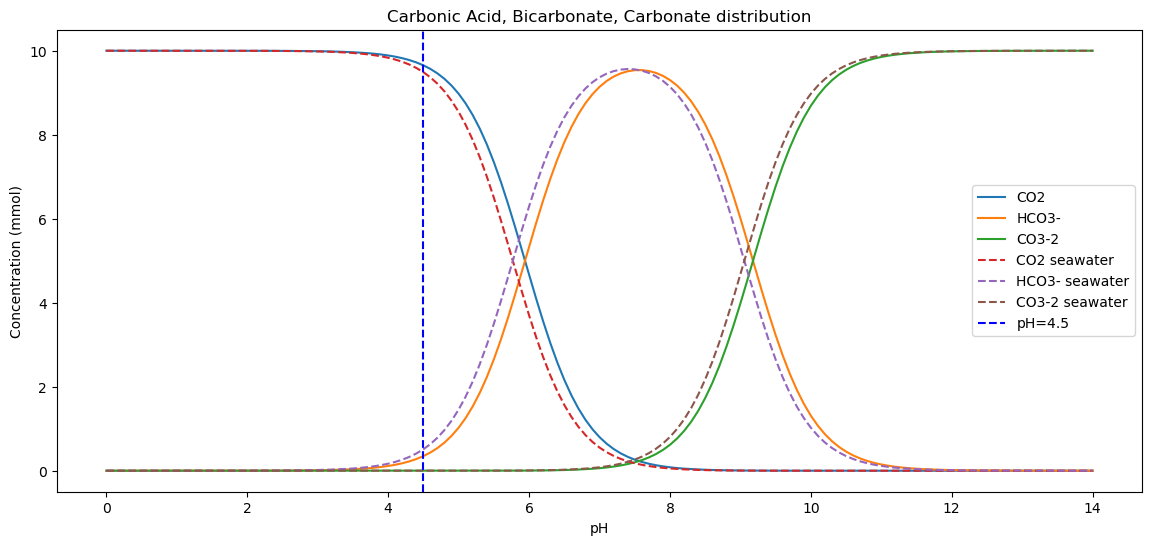

In [100]:
fig = plt.figure(figsize=[14,6])

plt.plot(phs,co2,label='CO2')
plt.plot(phs,hco3,label='HCO3-')
plt.plot(phs,co3,label='CO3-2')

plt.plot(phs,co2_I,label='CO2 seawater', linestyle='--')
plt.plot(phs,hco3_I,label='HCO3- seawater', linestyle='--')
plt.plot(phs,co3_I,label='CO3-2 seawater', linestyle='--')

#plt.xlim([3,7])

plt.xlabel("pH")

plt.axvline(x=4.5, color='b', linestyle='--', label='pH=4.5')

plt.ylabel("Concentration (mmol)")
plt.title("Carbonic Acid, Bicarbonate, Carbonate distribution")
lgnd = plt.legend()

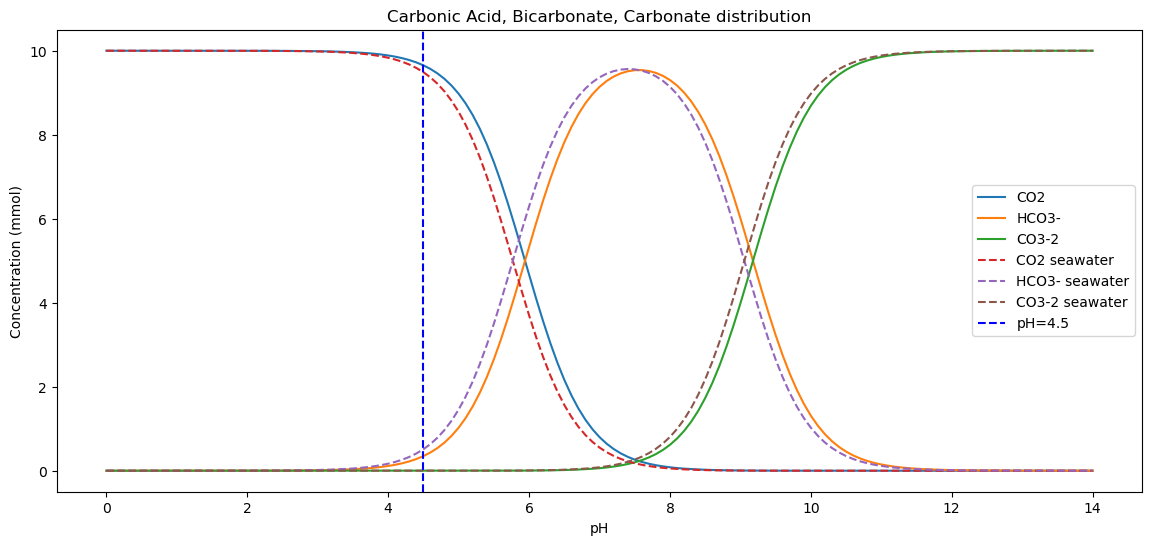

In [101]:
fig = plt.figure(figsize=[14,6])

plt.plot(phs,co2,label='CO2')
plt.plot(phs,hco3,label='HCO3-')
plt.plot(phs,co3,label='CO3-2')

plt.plot(phs,co2_I,label='CO2 seawater', linestyle='--')
plt.plot(phs,hco3_I,label='HCO3- seawater', linestyle='--')
plt.plot(phs,co3_I,label='CO3-2 seawater', linestyle='--')

#plt.xlim([3,7])

plt.xlabel("pH")

plt.axvline(x=4.5, color='b', linestyle='--', label='pH=4.5')

plt.ylabel("Concentration (mmol)")
plt.title("Carbonic Acid, Bicarbonate, Carbonate distribution")
lgnd = plt.legend()

